===== Ridge Regression Results =====
Best alpha (λ): 44.98
Intercept: 46.42
Coefficients:
mileage: -1.260
engine_size: 2.332
horsepower: 1.732
torque: 1.354
doors: 1.221
airbags: 1.548
weight: 2.057
fuel_efficiency: -0.919
brand_score: 0.879
luxury_index: 1.466
R² (Ridge): 0.491

===== OLS Results =====
R² (OLS): 0.513


<Figure size 1000x600 with 0 Axes>

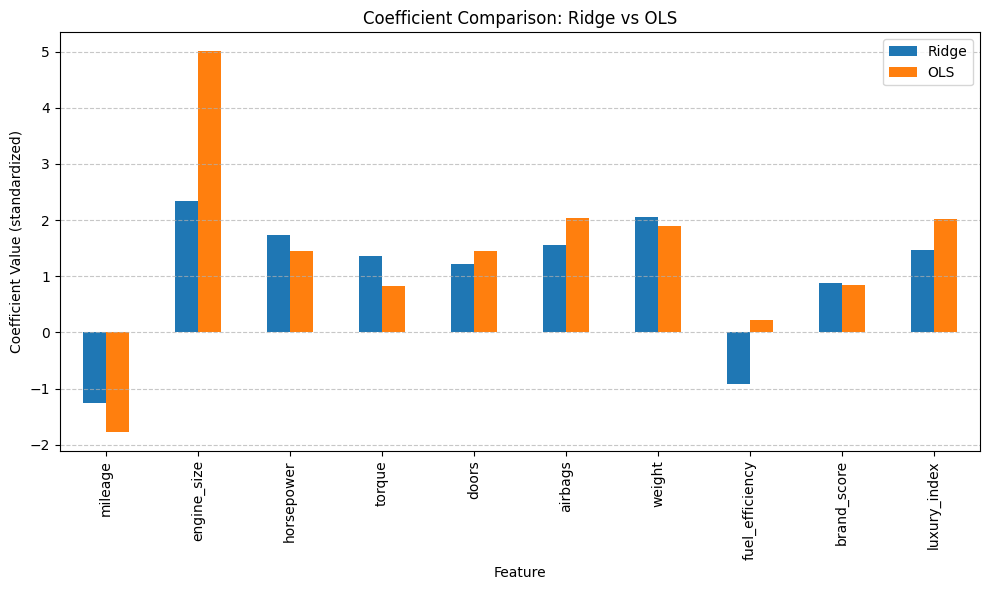

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv(r"C:\AI workforce\Car price Prediction\cars_ridge.csv")

X = df.drop(columns=["price_k"])
y = df["price_k"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = np.logspace(-3, 3, 50)  
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_cv.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)

ols = LinearRegression()
ols.fit(X_train_scaled, y_train)

y_pred_ols = ols.predict(X_test_scaled)
r2_ols = r2_score(y_test, y_pred_ols)

print("===== Ridge Regression Results =====")
print(f"Best alpha (λ): {ridge_cv.alpha_:.2f}")
print(f"Intercept: {ridge_cv.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X.columns, ridge_cv.coef_):
    print(f"{feature}: {coef:.3f}")
print(f"R² (Ridge): {r2_ridge:.3f}")

print("\n===== OLS Results =====")
print(f"R² (OLS): {r2_ols:.3f}")

plt.figure(figsize=(10, 6))
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Ridge": ridge_cv.coef_,
    "OLS": ols.coef_
})

coef_df.set_index("Feature").plot(kind="bar", figsize=(10, 6))
plt.title("Coefficient Comparison: Ridge vs OLS")
plt.ylabel("Coefficient Value (standardized)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
